In [72]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [73]:
bank= pd.read_csv("/content/Bank customers.csv")

In [74]:
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [75]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [76]:
bank.isna().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [77]:
bank.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [78]:
bank.Gender.value_counts()

,count
Gender,
F,5358
M,4769


In [79]:
bank.Education_Level.value_counts()

,count
Education_Level,
Graduate,3128
High School,2013
Unknown,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451


In [80]:
# converting Gender into numerical data
def sam1(f):
    if f=='M':
        return 1
    else:
        return 0
bank['Gender'] = bank.Gender.map(sam1)

In [81]:
bank.Gender.value_counts()

,count
Gender,
0,5358
1,4769


In [82]:
bank.Attrition_Flag.value_counts()

,count
Attrition_Flag,
Existing Customer,8500
Attrited Customer,1627


In [83]:
# converting Attrited_Flag into numerical data

def sam2(g):
  if g== 'Existing Customer':
    return 1
  else:
    return 0
bank['Attrition_Flag']= bank.Attrition_Flag.map(sam2)

In [84]:
bank.Attrition_Flag.value_counts()

,count
Attrition_Flag,
1,8500
0,1627


In [85]:
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [86]:
y= bank['Card_Category']
x= bank.copy()

In [87]:
x.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [88]:
x.Income_Category.value_counts()

,count
Income_Category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
Unknown,1112
$120K +,727


In [89]:
# Converting some columns into numeric data with LabelEncoder

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
x['Income_Category']= le.fit_transform(x['Income_Category'])
x['Education_Level']= le.fit_transform(x['Education_Level'])
x['Marital_Status']= le.fit_transform(x['Marital_Status'])

In [90]:
x.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [91]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int64  
 6   Marital_Status            10127 non-null  int64  
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [92]:
x= x.drop(['CLIENTNUM', 'Card_Category'], axis=1)

In [93]:
x.shape

(10127, 19)

In [94]:
y.value_counts()

,count
Card_Category,
Blue,9436
Silver,555
Gold,116
Platinum,20


In [95]:
y= le.fit_transform(y)    # applying LabelEncoder in y

In [96]:
type(y)

numpy.ndarray

In [97]:
y= pd.DataFrame(y)  # converting y into dataframe

In [98]:
y.value_counts()

,count
0,
0,9436
3,555
1,116
2,20


In [99]:
x.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [100]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [101]:
def boxplots(ref):
  sns.boxplot(x[ref])
  plt.show()

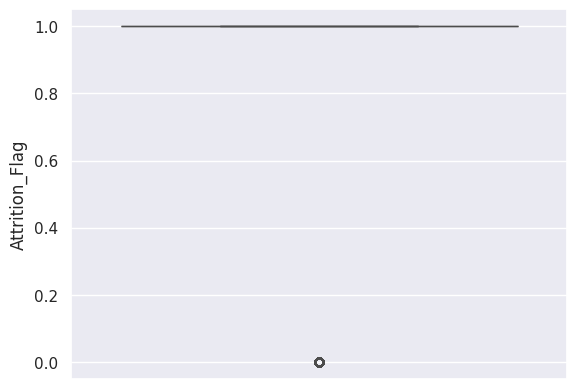

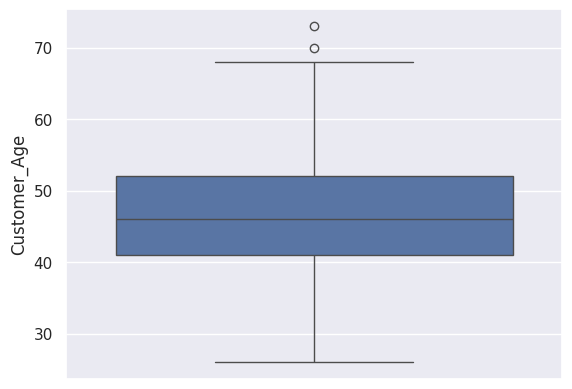

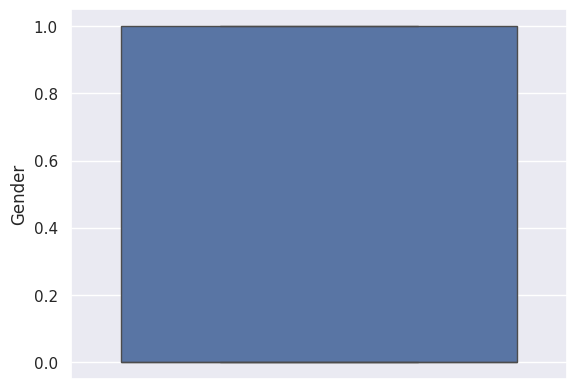

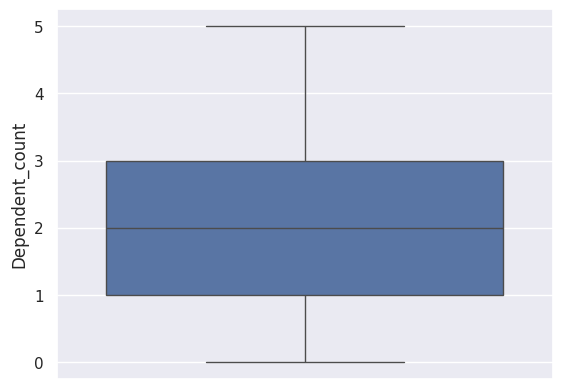

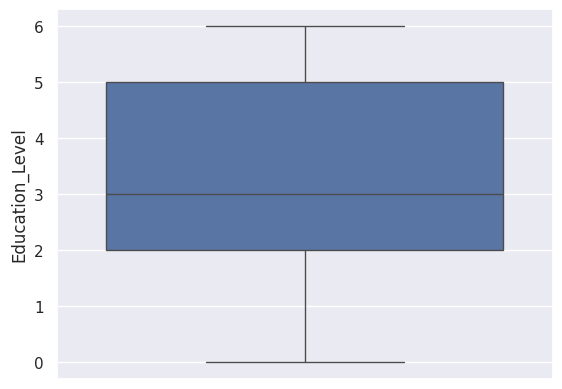

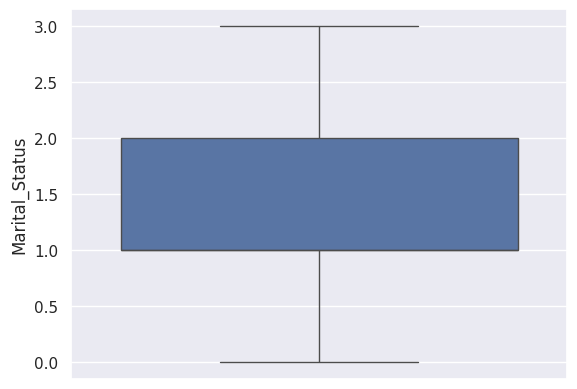

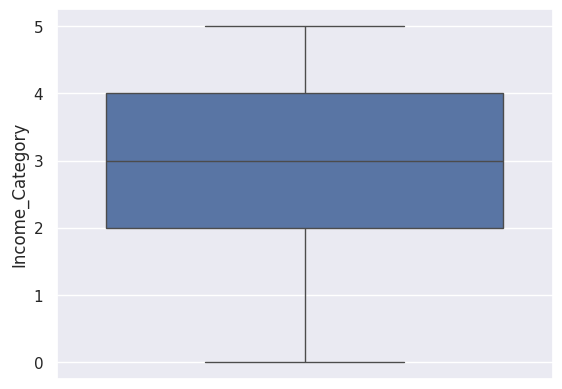

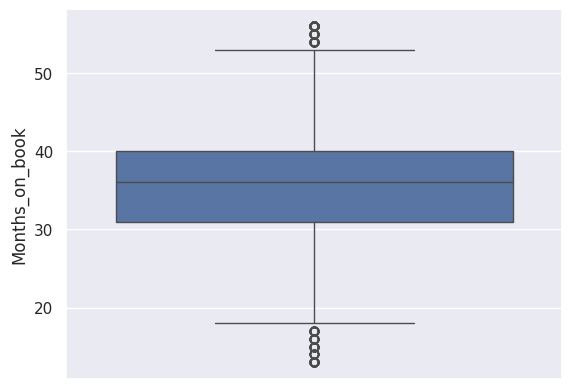

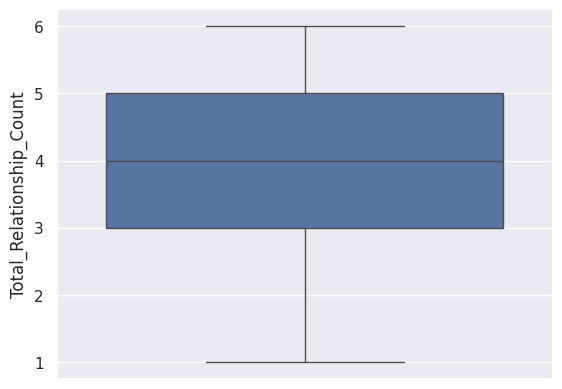

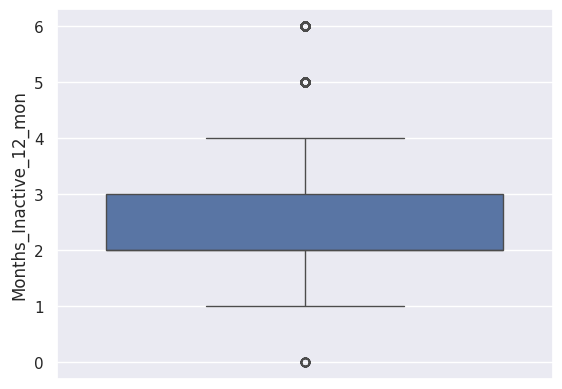

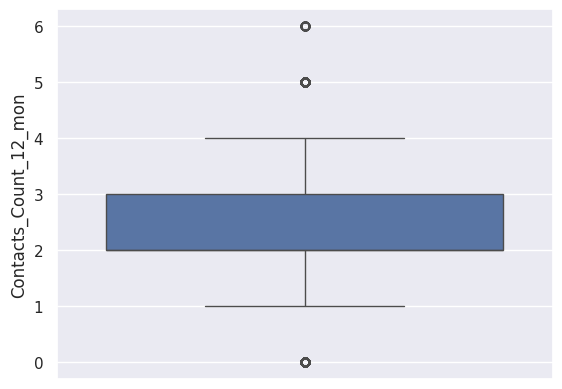

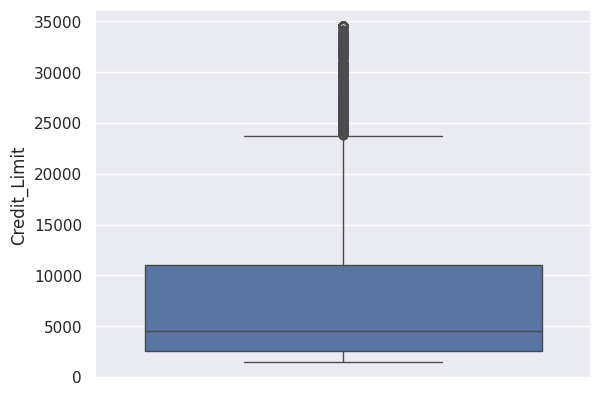

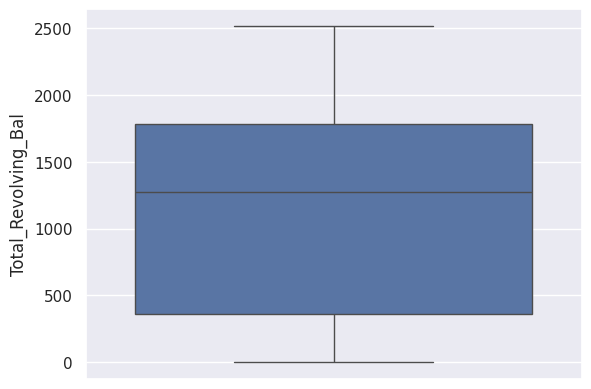

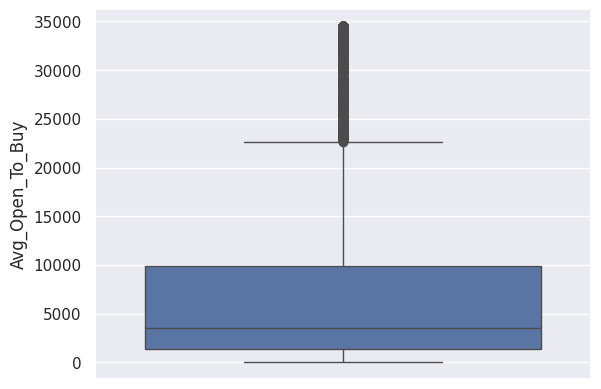

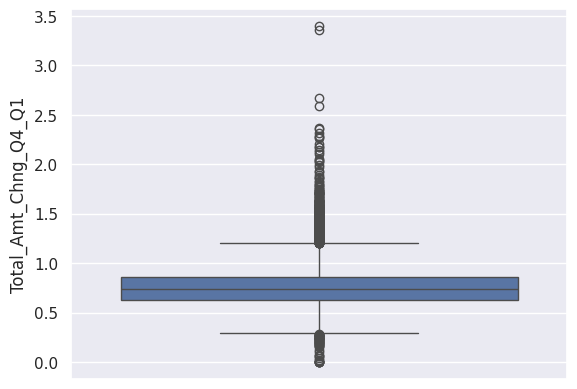

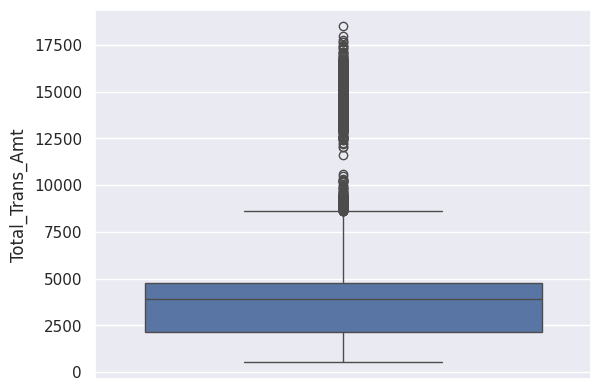

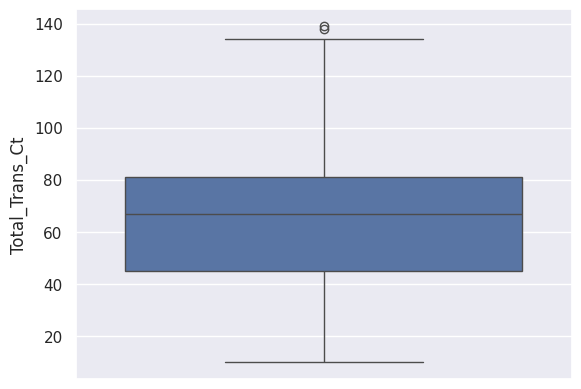

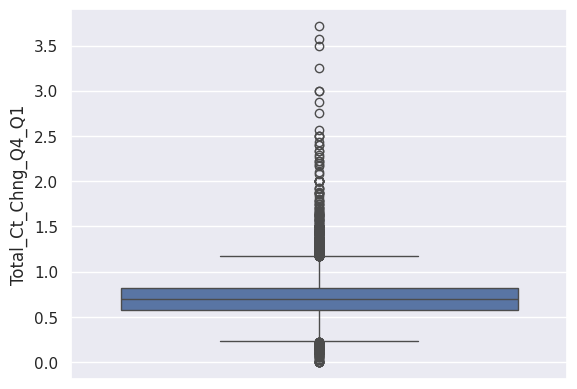

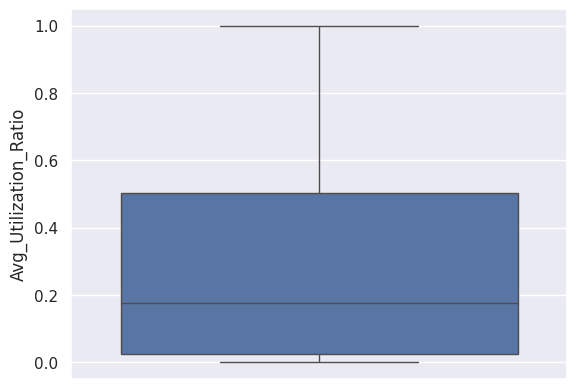

In [102]:
for i in x:
  boxplots(i)

In [103]:
q1= x.quantile(0.25)
q3= x.quantile(0.75)
iqr= q3-q1
ul= q3+1.5*iqr
ll= q1-1.5*iqr

In [104]:
print(ul)
print()
print(ll)

Attrition_Flag                  1.000
Customer_Age                   68.500
Gender                          2.500
Dependent_count                 6.000
Education_Level                 9.500
Marital_Status                  3.500
Income_Category                 7.000
Months_on_book                 53.500
Total_Relationship_Count        8.000
Months_Inactive_12_mon          4.500
Contacts_Count_12_mon           4.500
Credit_Limit                23836.250
Total_Revolving_Bal          3921.500
Avg_Open_To_Buy             22660.750
Total_Amt_Chng_Q4_Q1            1.201
Total_Trans_Amt              8619.250
Total_Trans_Ct                135.000
Total_Ct_Chng_Q4_Q1             1.172
Avg_Utilization_Ratio           1.223
dtype: float64

Attrition_Flag                  1.000
Customer_Age                   24.500
Gender                         -1.500
Dependent_count                -2.000
Education_Level                -2.500
Marital_Status                 -0.500
Income_Category                -1.

In [105]:
((x>ul) | (x<ll)).sum()

,0
Attrition_Flag,1627
Customer_Age,2
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Months_on_book,386
Total_Relationship_Count,0
Months_Inactive_12_mon,331


In [106]:
x[((x>ul) | (x<ll))]= np.nan  # converting outliers into null values

In [107]:
((x>ul) | (x<ll)).sum()

,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Months_on_book,0
Total_Relationship_Count,0
Months_Inactive_12_mon,0


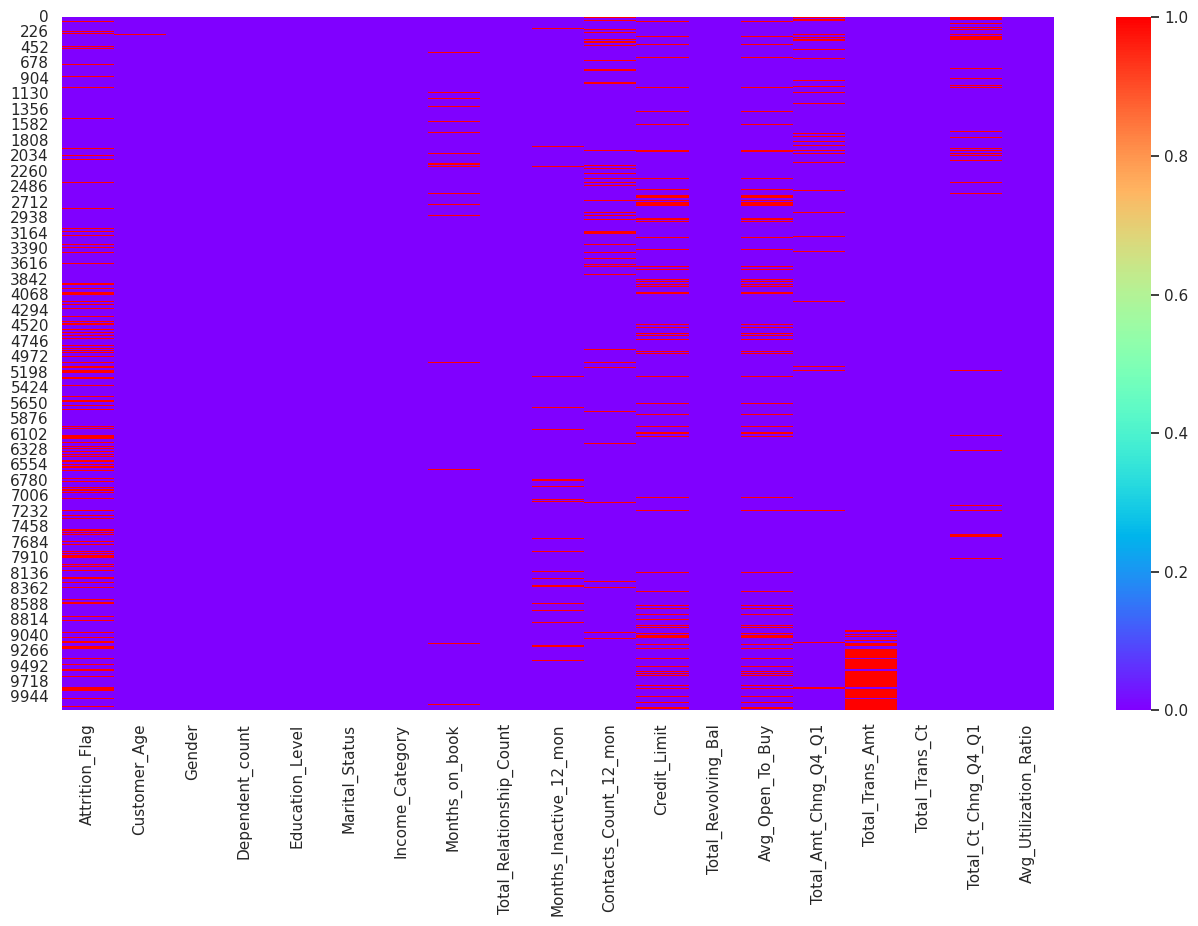

In [108]:
plt.figure(figsize= (16,9))
sns.heatmap(x.isna(), cmap='rainbow')
plt.show()

In [109]:
# Applying capping by using KNN imputer
from sklearn.impute import KNNImputer
imputer= KNNImputer(n_neighbors=5)
x_imp= pd.DataFrame(imputer.fit_transform(x), columns= x.columns)
x_imp

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1.0,45.0,1.0,3.0,3.0,1.0,2.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,0.7828,1144.0,42.0,0.8412,0.061
1,1.0,49.0,0.0,5.0,2.0,2.0,4.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,0.7648,1291.0,33.0,0.7442,0.105
2,1.0,51.0,1.0,3.0,2.0,1.0,3.0,36.0,4.0,1.0,2.8,3418.0,0.0,3418.0,0.7050,1887.0,20.0,0.5718,0.000
3,1.0,40.0,0.0,4.0,3.0,3.0,4.0,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,0.8256,1171.0,20.0,0.8286,0.760
4,1.0,40.0,1.0,3.0,5.0,1.0,2.0,21.0,5.0,1.0,3.2,4716.0,0.0,4716.0,0.8498,816.0,28.0,0.8014,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1.0,50.0,1.0,2.0,2.0,2.0,1.0,40.0,3.0,2.0,3.0,4003.0,1851.0,2152.0,0.7030,4724.2,117.0,0.8570,0.462
10123,1.0,41.0,1.0,2.0,6.0,0.0,1.0,25.0,4.0,2.0,3.0,4277.0,2186.0,2091.0,0.8040,5210.2,69.0,0.6830,0.511
10124,1.0,44.0,0.0,1.0,3.0,1.0,4.0,36.0,5.0,3.0,4.0,5409.0,0.0,5409.0,0.8190,3423.8,60.0,0.8180,0.000
10125,1.0,30.0,1.0,2.0,2.0,3.0,1.0,36.0,4.0,3.0,3.0,5281.0,0.0,5281.0,0.5350,8395.0,62.0,0.7220,0.000


In [110]:
x_imp.isna().sum().sum()

np.int64(0)

In [111]:
#   Applying Standardization
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scaled= pd.DataFrame(scaler.fit_transform(x_imp), columns=x_imp.columns)

In [112]:
x_scaled

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.0,-0.164953,1.059956,0.503368,-0.052637,-0.628128,-0.574182,0.445726,0.763943,-1.483108,0.560289,1.221012,-0.473422,1.285984,0.272150,-1.436350,-0.974253,0.837367,-0.775882
1,0.0,0.334481,-0.943436,2.043199,-0.597678,0.727306,0.755053,1.162235,1.407306,-1.483108,-0.543612,0.361427,-0.366667,0.413906,0.161001,-1.354814,-1.358070,0.282046,-0.616276
2,0.0,0.584198,1.059956,0.503368,-0.597678,-0.628128,0.090436,0.015820,0.120579,-1.483108,0.339509,-0.576266,-1.426858,-0.352489,-0.208260,-1.024235,-1.912473,-0.704937,-0.997155
3,0.0,-0.789247,-0.943436,1.273283,-0.052637,2.082739,0.755053,-0.270784,-0.522785,2.064343,-1.647513,-0.596617,1.661686,-0.858148,0.536438,-1.421374,-1.912473,0.765233,1.759686
4,0.0,-0.789247,1.059956,0.503368,1.037447,-0.628128,-0.574182,-2.133708,0.763943,-1.483108,0.781070,-0.324690,-1.426858,-0.102167,0.685872,-1.618279,-1.571302,0.609514,-0.997155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.0,0.459340,1.059956,-0.266547,-0.597678,0.727306,-1.238799,0.589028,-0.522785,-0.300624,0.560289,-0.462882,0.844455,-0.596640,-0.220610,0.549455,2.224226,0.927821,0.678714
10123,0.0,-0.664388,1.059956,-0.266547,1.582489,-1.983561,-1.238799,-1.560501,0.120579,-0.300624,0.560289,-0.409776,1.255524,-0.608404,0.403059,0.819021,0.177200,-0.068321,0.856458
10124,0.0,-0.289812,-0.943436,-1.036462,-0.052637,-0.628128,0.755053,0.015820,0.763943,0.881859,1.664191,-0.190373,-1.426858,0.031480,0.495683,-0.171829,-0.206618,0.704548,-0.997155
10125,0.0,-2.037833,1.059956,-0.266547,-0.597678,2.082739,-1.238799,0.015820,0.120579,0.881859,0.560289,-0.215182,-1.426858,0.006794,-1.258001,2.585512,-0.121325,0.154952,-0.997155


In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y, test_size= 0.2, random_state= 42, stratify= y)

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

In [115]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [116]:
rf_pred_train= rf.predict(x_train)
rf_pred_test= rf.predict(x_test)

In [117]:
from sklearn.metrics import accuracy_score

In [118]:
print(accuracy_score(y_train, rf_pred_train))
print(accuracy_score(y_test, rf_pred_test))

1.0
0.9417571569595261


In [119]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [120]:
fx= pd.DataFrame({'Features': x_train.columns, 'r_features': gb.feature_importances_}).sort_values(by= 'r_features', ascending= False)

In [121]:
fx

,Features,r_features
11,Credit_Limit,0.222970
6,Income_Category,0.193703
12,Total_Revolving_Bal,0.167253
18,Avg_Utilization_Ratio,0.154288
15,Total_Trans_Amt,0.073722
13,Avg_Open_To_Buy,0.057753
2,Gender,0.056919
16,Total_Trans_Ct,0.027503
7,Months_on_book,0.010238
17,Total_Ct_Chng_Q4_Q1,0.007853


In [125]:
from sklearn.feature_selection import RFE
f1 = RFE(estimator=gb, n_features_to_select=15, step=1)
f1 = f1.fit(x_train, y_train)

In [126]:
ygb_pred_train= f1.predict(x_train)
ygb_pred_test= f1.predict(x_test)

In [127]:
print(accuracy_score(y_train, ygb_pred_train))
print()
print(accuracy_score(y_test, ygb_pred_test))

0.9774101962720652

0.9521224086870681
